In [68]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
data = pd.read_csv("gold.csv")

In [33]:
data.head(20)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [34]:
data["Date"] =pd.to_datetime(data["Date"])

In [35]:
data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [37]:
data.duplicated().sum()

0

In [38]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Exploratory Data Analysis

<Axes: >

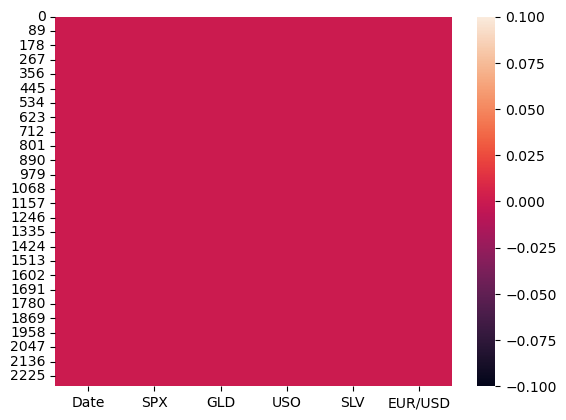

In [39]:
sn.heatmap(data.isnull())

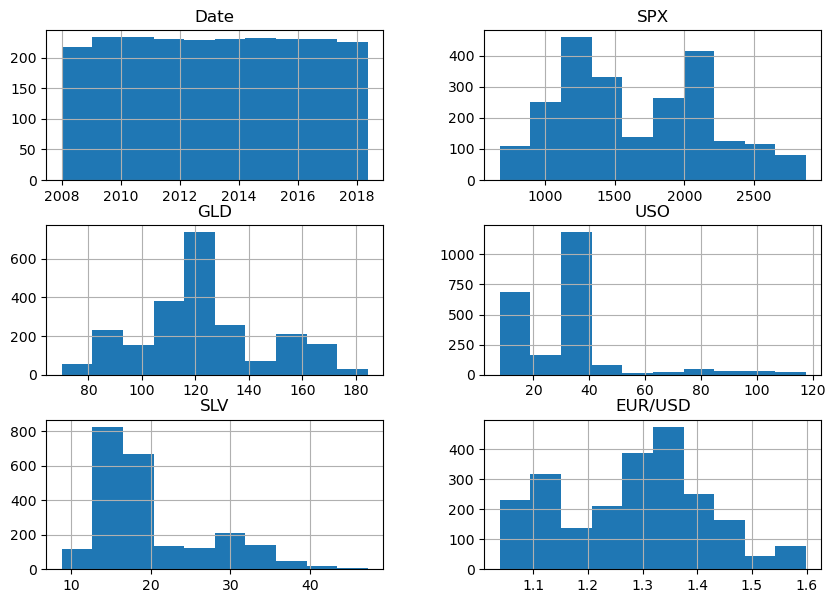

In [40]:
data.hist(figsize =(10,7))
plt.show()

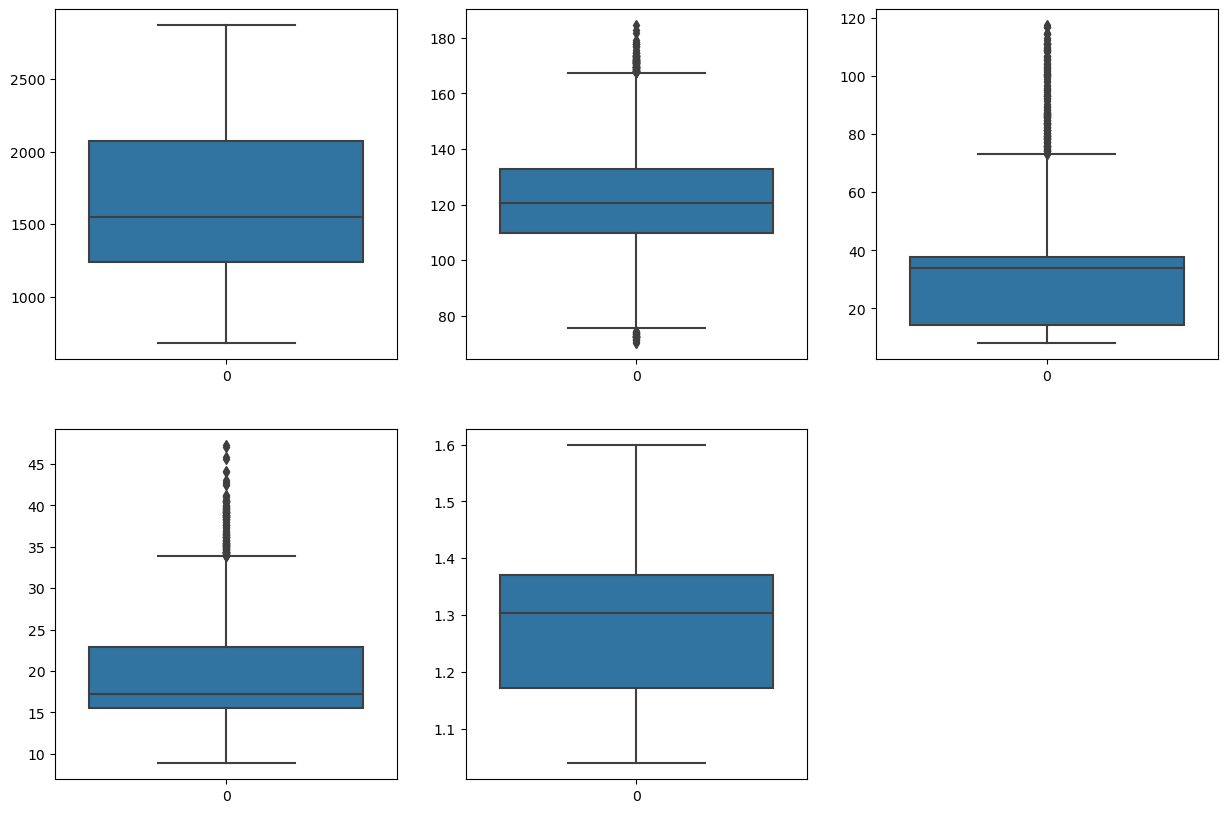

In [42]:
plt.figure(figsize=(15,10))
k=0
colunName = ["SPX","GLD","USO","SLV","EUR/USD"]
for i in colunName:
    k =k+1
    plt.subplot(2,3,k)
    sn.boxplot(data[i])
plt.show()   


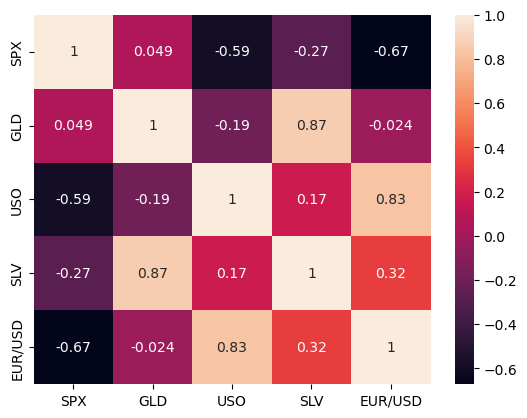

In [46]:

sn.heatmap(data.drop(columns="Date").corr(),annot=True)
plt.show()

<Axes: >

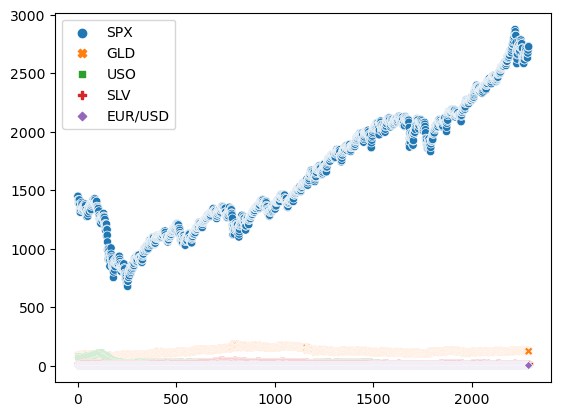

In [44]:
sn.scatterplot(data)

In [47]:
X = data.drop(columns=["Date","GLD"])
Y=data["GLD"]

In [48]:
XTR,XTS,YTR,YTS=train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
modelLR= RandomForestRegressor()

In [51]:
modelLR.fit(XTR,YTR)

RandomForestRegressor()

In [54]:
PR= modelLR.predict(XTR)

In [55]:
modelLR.score(XTR,YTR)*100

99.85051186670192

In [ ]:
# Model Evaluation

In [69]:
print(mean_absolute_error(PR,YTR))
print(mean_squared_error(PR,YTR))
print(r2_score(PR,YTR))

0.4873122806277265
0.8153929026241682
0.9984925036644762


<Axes: xlabel='GLD'>

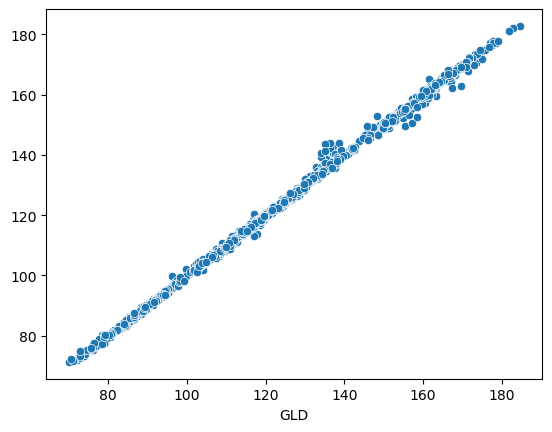

In [56]:
sn.scatterplot(x=YTR,y=PR)

In [60]:
modelDTR = DecisionTreeRegressor()

In [61]:
modelDTR.fit(XTR,YTR)

DecisionTreeRegressor()

In [64]:
PSDR = modelDTR.predict(XTR)

In [66]:
modelDTR.score(XTR,YTR)*100

100.0

In [70]:
print(mean_absolute_error(PSDR,YTR))
print(mean_squared_error(PSDR,YTR))
print(r2_score(PSDR,YTR))

0.0
0.0
1.0


<Axes: xlabel='GLD'>

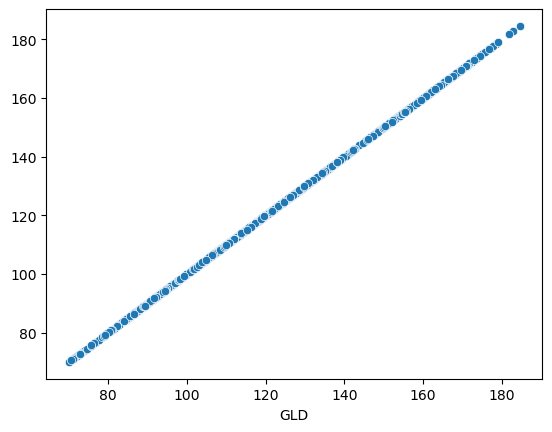

In [67]:
sn.scatterplot(x=YTR,y=PSDR)

In [73]:
# predict sytem
input =(1310.500000,70.550003,15.902000,1.464794)
inputV = np.asarray(input).reshape(1,-1)
predict = modelDTR.predict(inputV)
print(predict)

[88.169998]


C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
